# Investigating the current state of the loans

Let's summarise the current percentage of the loans that are recovered against the investor funding and the total amount funded and visualise the results on an appropriate graph.

In [42]:
import db_utils as dbu
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('loan_payments_clean.csv')

We'll sum the total_payment variable and the funded_amount and funded_amount_inv.  We can then plot them in a bar chart:

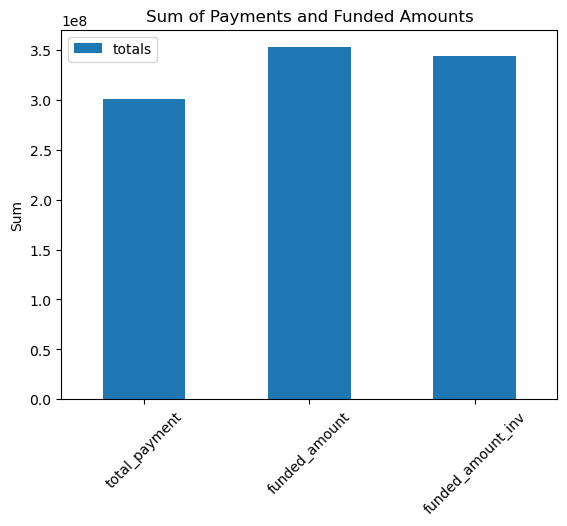

In [43]:
totals_series = df[['total_payment', 'funded_amount', 'funded_amount_inv']].sum()
totals_df = totals_series.to_frame(name='totals')
totals_df.plot(kind='bar')
plt.ylabel('Sum')
plt.title('Sum of Payments and Funded Amounts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

A nice way to visualise them might be as percentages of the funding.

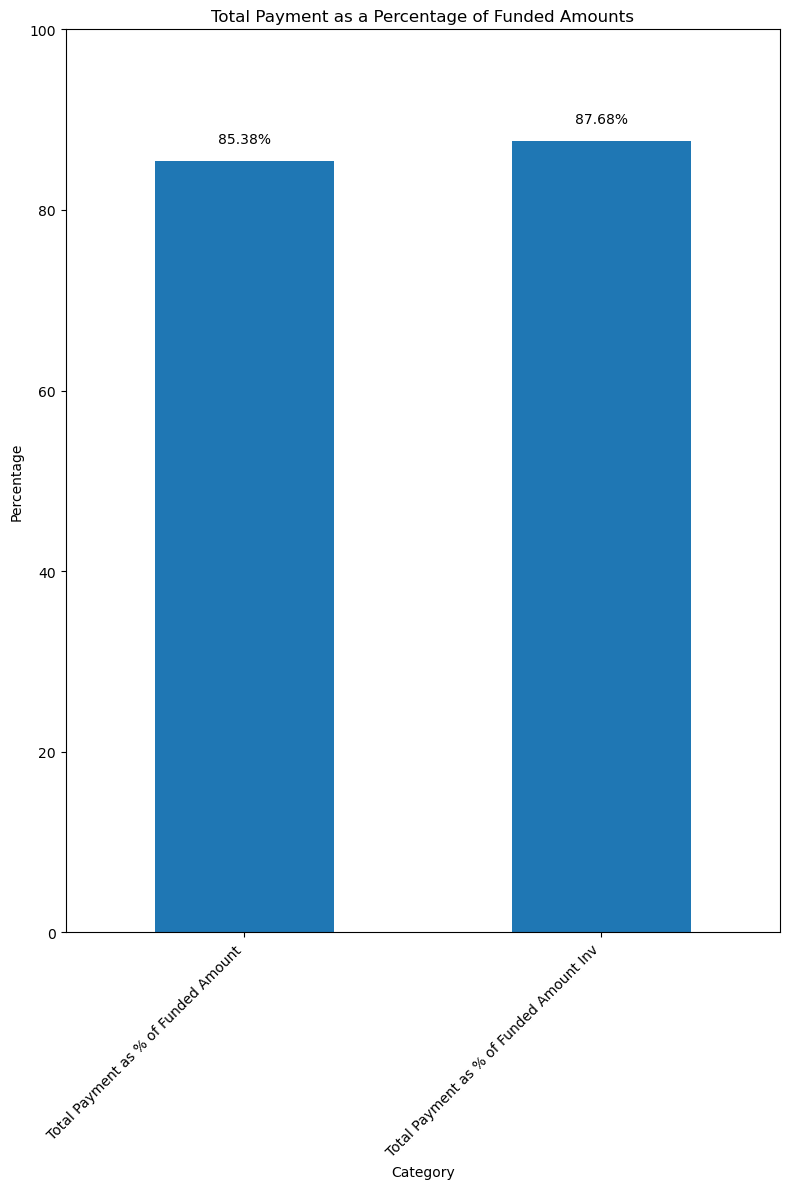

In [44]:

# Summing the columns
total_payment_sum = df['total_payment'].sum()
funded_amount_sum = df['funded_amount'].sum()
funded_amount_inv_sum = df['funded_amount_inv'].sum()

# Calculate the percentages
percent_funded_amount = (total_payment_sum / funded_amount_sum) * 100
percent_funded_amount_inv = (total_payment_sum / funded_amount_inv_sum) * 100

# Create a DataFrame with the percentages
percentages = {
    'Category': ['Total Payment as % of Funded Amount', 'Total Payment as % of Funded Amount Inv'],
    'Percentage': [percent_funded_amount, percent_funded_amount_inv]
}
percentages_df = pd.DataFrame(percentages)

# Plotting the percentages
fig, ax = plt.subplots(figsize=(8, 12))  # Make the plot 3 times taller (default is (6, 4), so (8, 12) is 3 times taller)
percentages_df.plot(kind='bar', x='Category', y='Percentage', legend=False, ax=ax)
plt.ylabel('Percentage')
plt.title('Total Payment as a Percentage of Funded Amounts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Add percentage labels on the bars
for index, row in percentages_df.iterrows():
    ax.text(index, row['Percentage'] + 2, f"{row['Percentage']:.2f}%", ha='center')

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Future predictions

Additionally let's visualise what percentage of the total amount would be recovered up to 6 months' in the future.  We'll need to add 6*installment onto each total payment for each record that has 'Current' status.  There are more status' that will potential also increase but this will give us a conservative estimate.  We should also add a check that the 6 month prediciton for each record doesn't exceed the amount they owe.

predicted_6_mths_total_payment = if (loan_status == 'Current') and (out_prncp > total payment + 6*installment) then total payment + 6*installment, else total_payment

In [45]:
def calculate_predicted_payment(row):
    if row['loan_status'] != 'Current':
        return row['total_payment']
    elif row['out_prncp'] < 6 * row['instalment']:
        return row['total_payment'] + row['out_prncp']
    else:
        return row['total_payment'] + 6 * row['instalment']

df['predicted_6_mths_total_payment'] = df.apply(calculate_predicted_payment, axis=1)

print(df.head())

   Unnamed: 0        id  member_id  loan_amount  funded_amount  \
0           0  38676116   41461848         8000         8000.0   
1           1  38656203   41440010        13200        13200.0   
2           2  38656111   41439917         2525         2525.0   
3           3  38656063   41439868        10000        10000.0   
4           4  38656052   41439857        10000        10000.0   

   funded_amount_inv  int_rate  instalment  annual_inc    dti  ...  \
0             8000.0      7.49      248.82     46000.0  19.54  ...   
1            13200.0      6.99      407.52     50000.0  24.20  ...   
2             2525.0     11.44       83.20     32000.0   6.60  ...   
3            10000.0     12.99      227.48     50048.0  20.67  ...   
4            10000.0      8.19      314.25    103000.0  15.95  ...   

   verification_status  issue_date  loan_status  payment_plan  \
0         Not Verified  2021-01-01      Current             n   
1         Not Verified  2021-01-01      Current     

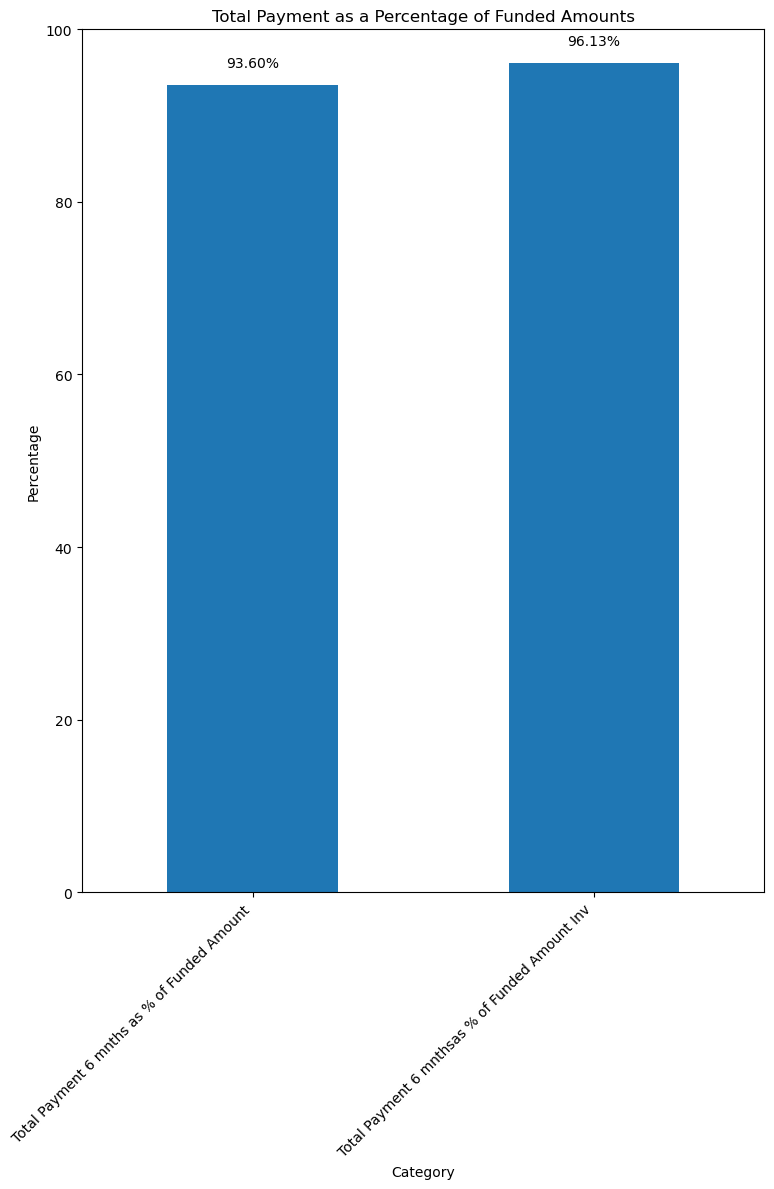

In [46]:
# Summing the columns
funded_amount_sum = df['funded_amount'].sum()
funded_amount_inv_sum = df['funded_amount_inv'].sum()
total_payment_sum_6_mths = df['predicted_6_mths_total_payment'].sum()

# Calculate the percentages
percent_funded_amount_6_mths = (total_payment_sum_6_mths / funded_amount_sum) * 100
percent_funded_amount_inv_6_mths= (total_payment_sum_6_mths / funded_amount_inv_sum) * 100

# Create a DataFrame with the percentages
percentages = {
    'Category': ['Total Payment 6 mnths as % of Funded Amount', 'Total Payment 6 mnthsas % of Funded Amount Inv'],
    'Percentage': [percent_funded_amount_6_mths, percent_funded_amount_inv_6_mths]
}
percentages_df = pd.DataFrame(percentages)

# Plotting the percentages
fig, ax = plt.subplots(figsize=(8, 12))  # Make the plot 3 times taller (default is (6, 4), so (8, 12) is 3 times taller)
percentages_df.plot(kind='bar', x='Category', y='Percentage', legend=False, ax=ax)
plt.ylabel('Percentage')
plt.title('Total Payment as a Percentage of Funded Amounts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Add percentage labels on the bars
for index, row in percentages_df.iterrows():
    ax.text(index, row['Percentage'] + 2, f"{row['Percentage']:.2f}%", ha='center')

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

Let's check what percentage of loans have been a loss to the company:

Loans marked as Charged Off in the loan_status column represent a loss to the company.

Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [47]:
df.loan_status.value_counts(normalize= True)

loan_status
Fully Paid                                             0.449431
Current                                                0.382362
Charged Off                                            0.121100
Does not meet the credit policy. Status:Fully Paid     0.020714
Late (31-120 days)                                     0.010430
Does not meet the credit policy. Status:Charged Off    0.008344
In Grace Period                                        0.004693
Late (16-30 days)                                      0.001912
Default                                                0.001014
Name: proportion, dtype: float64

We can see that 12.11% of loans we're charged off.  Let's calculate the total that was paid towards these loans.

In [48]:
total_payment_charged_off_sum = df[df['loan_status'] == 'Charged Off']['total_payment'].sum()
print(total_payment_charged_off_sum.round(2))

22657762.5


We're going to calculate the loss in revenue these loans would have generated for the company if they had finished their term. We'll also visualise the loss projected over the remaining term of these loans.

Let's just check the difference between the previous figure and the total loan amount for the charged off loans:

In [49]:
total_loan_amount_charged_off = df[df['loan_status'] == 'Charged Off']['loan_amount'].sum()
print((total_loan_amount_charged_off-total_payment_charged_off_sum).round(2))

26649112.5


About 27 million.  We're going to need a new column that caculates the remaining term of these loans by comparing the issue_date, last_payment_date and the term_numerical.  We'll create a series that is the sum of the instalment column of each loan still in term.

In [57]:
df['months_active'] = df['last_payment_date'].dt.to_period('M').astype(int) - df['issue_date'].dt.to_period('M').astype('int64')
df['remaining_term_months'] = df['term_numerical']- df['months_active']

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34517 entries, 0 to 34516
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          34517 non-null  int64         
 1   id                                  34517 non-null  int64         
 2   member_id                           34517 non-null  int64         
 3   loan_amount                         34517 non-null  int64         
 4   funded_amount                       34517 non-null  float64       
 5   funded_amount_inv                   34517 non-null  float64       
 6   int_rate                            34517 non-null  float64       
 7   instalment                          34517 non-null  float64       
 8   annual_inc                          34517 non-null  float64       
 9   dti                                 34517 non-null  float64       
 10  delinq_2yrs           

It looks like we've lost the date formatting that we previously applied to the dates, let's reapply it.

In [52]:
transform = dbu.DataTransform(df)
transform.format_to_date("last_payment_date")
transform.format_to_date("issue_date")
transform.format_to_date("earliest_credit_line")
transform.format_to_date("last_credit_pull_date")

Column 'last_payment_date' converted to datetime format.
Column 'issue_date' converted to datetime format.
Column 'earliest_credit_line' converted to datetime format.
Column 'last_credit_pull_date' converted to datetime format.


In [58]:
df.head()

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,...,loan_status,payment_plan,purpose,earliest_credit_line,last_payment_date,last_credit_pull_date,application_type,predicted_6_mths_total_payment,remaining_term_months,months_active
0,0,38676116,41461848,8000,8000.0,8000.0,7.49,248.82,46000.0,19.54,...,Current,n,credit_card,1987-10-01,2022-01-01,2022-01-01,INDIVIDUAL,4475.43,24,12
1,1,38656203,41440010,13200,13200.0,13200.0,6.99,407.52,50000.0,24.20,...,Current,n,credit_card,2001-09-01,2022-01-01,2022-01-01,INDIVIDUAL,7330.23,24,12
2,2,38656111,41439917,2525,2525.0,2525.0,11.44,83.20,32000.0,6.60,...,Current,n,home_improvement,2011-03-01,2022-01-01,2022-01-01,INDIVIDUAL,1412.80,24,12
3,3,38656063,41439868,10000,10000.0,10000.0,12.99,227.48,50048.0,20.67,...,Current,n,credit_card,2005-11-01,2022-01-01,2022-01-01,INDIVIDUAL,4087.42,48,12
4,4,38656052,41439857,10000,10000.0,10000.0,8.19,314.25,103000.0,15.95,...,Current,n,credit_card,2002-02-01,2022-01-01,2022-01-01,INDIVIDUAL,5651.95,24,12


In [62]:
# Initialize loss_series as a list of zeros for each month
max_remaining_term = df[df['loan_status'] == 'Charged Off']['remaining_term_months'].max()
loss_series = [0] * (max_remaining_term + 1)

# Iterate through each row of the DataFrame
for index, row in df[df['loan_status'] == 'Charged Off'].iterrows():
    remaining_months = row['remaining_term_months']
    installment = row['instalment']
    
    # Accumulate installment into loss_series for each remaining month
    for i in range(1, remaining_months + 1):
        loss_series[i] += installment

print(loss_series)


[0, 1438151.3899999976, 1435867.8299999975, 1431843.3099999977, 1427937.6599999976, 1421193.0799999973, 1415267.529999997, 1403952.099999997, 1397881.859999997, 1385887.6899999974, 1374369.3799999973, 1362413.9599999976, 1346871.6899999976, 1333151.0899999985, 1311348.8099999996, 1283509.0699999998, 1251521.55, 1210370.94, 1168265.5900000024, 1122144.940000002, 1081427.2600000016, 1042186.0400000019, 993868.6400000012, 951820.0500000006, 911067.5000000008, 866324.3500000006, 822033.6500000004, 778563.5800000007, 744122.4600000002, 701117.4600000007, 643988.2300000002, 602152.4300000003, 573772.1899999998, 547140.9699999995, 525537.9499999993, 500470.6699999993, 482855.33999999927, 475093.4999999992, 464881.6299999992, 453072.1199999991, 440649.5399999991, 420279.03999999893, 401217.9599999988, 385237.0499999989, 367699.9299999988, 346933.3299999993, 322855.3499999994, 302774.01999999955, 282310.0299999999, 253566.9400000001, 221261.46000000014, 196853.89000000004, 174775.22000000006, 1

In [66]:
loss_series.pop(0)

0

In [68]:
loss_series

[1438151.3899999976,
 1435867.8299999975,
 1431843.3099999977,
 1427937.6599999976,
 1421193.0799999973,
 1415267.529999997,
 1403952.099999997,
 1397881.859999997,
 1385887.6899999974,
 1374369.3799999973,
 1362413.9599999976,
 1346871.6899999976,
 1333151.0899999985,
 1311348.8099999996,
 1283509.0699999998,
 1251521.55,
 1210370.94,
 1168265.5900000024,
 1122144.940000002,
 1081427.2600000016,
 1042186.0400000019,
 993868.6400000012,
 951820.0500000006,
 911067.5000000008,
 866324.3500000006,
 822033.6500000004,
 778563.5800000007,
 744122.4600000002,
 701117.4600000007,
 643988.2300000002,
 602152.4300000003,
 573772.1899999998,
 547140.9699999995,
 525537.9499999993,
 500470.6699999993,
 482855.33999999927,
 475093.4999999992,
 464881.6299999992,
 453072.1199999991,
 440649.5399999991,
 420279.03999999893,
 401217.9599999988,
 385237.0499999989,
 367699.9299999988,
 346933.3299999993,
 322855.3499999994,
 302774.01999999955,
 282310.0299999999,
 253566.9400000001,
 221261.46000000

This list represents the montly totals of lost installments from the 'Charged Off' loans.

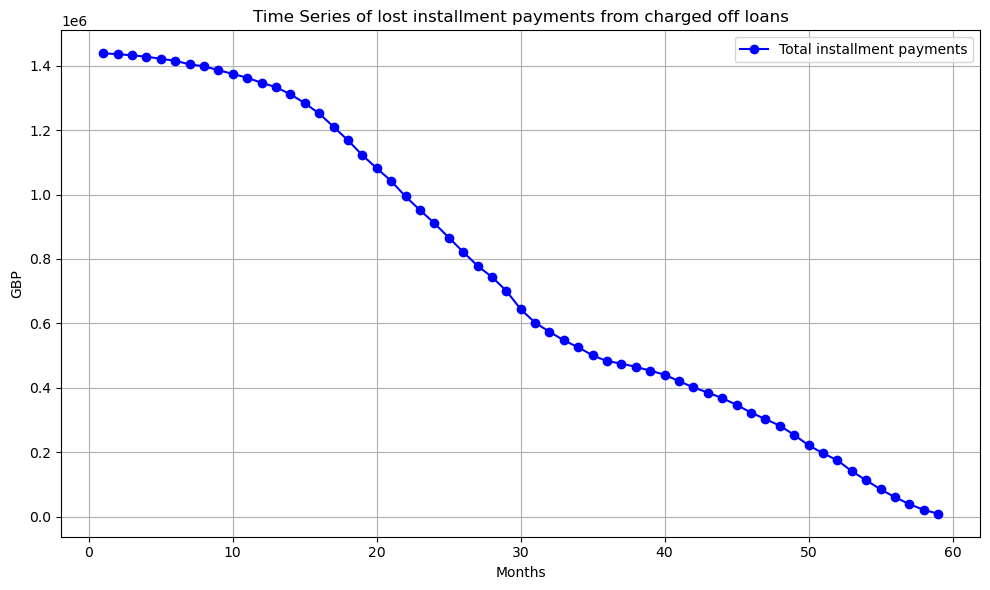

In [71]:
months = range(1, len(loss_series)+1)
# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(months, loss_series, marker='o', linestyle='-', color='b', label='Total installment payments')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('GBP')
plt.title('Time Series of lost installment payments from charged off loans')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Let's look at users that are currently behind on payments:

In [72]:
df.loan_status.value_counts(normalize= True)

loan_status
Fully Paid                                             0.449431
Current                                                0.382362
Charged Off                                            0.121100
Does not meet the credit policy. Status:Fully Paid     0.020714
Late (31-120 days)                                     0.010430
Does not meet the credit policy. Status:Charged Off    0.008344
In Grace Period                                        0.004693
Late (16-30 days)                                      0.001912
Default                                                0.001014
Name: proportion, dtype: float64

In [74]:
print(round((0.010430+0.001912)*100,2))

1.23


1.23% of all records are late on payments.

In [75]:
print(round((0.010430+0.001912)/(1-0.449431)*100,2))

2.24


2.24% of all unpaid loans are late on payments.

Let's try and look at the total payments that the company would loose if these loans became charged off.  We'll look at the total loan_amount and the total total_payment.

In [78]:
total_late_loan_amount = df[((df['loan_status'] == 'Late (31-120 days)') | (df['loan_status'] == 'Late (16-30 days)'))]['loan_amount'].sum()
print(total_late_loan_amount)

5071475


In [80]:
total_late_payment = df[((df['loan_status'] == 'Late (31-120 days)') | (df['loan_status'] == 'Late (16-30 days)'))]['total_payment'].sum()
print(total_late_payment)

3277022.7399999998


In [82]:
print(f'Current loss if all the loans with late payments became charged off is: {round(total_late_loan_amount - total_late_payment,2)}')

Current loss if all the loans with late payments became charged off is: 1794452.26


Let's try to predict the future loss of all these loans for their full term.  We can multiply the remaining term by the installment.

In [83]:
def sum_future_payments(row):
    return row['remaining_term_months'] * row['instalment']

df['future_sum_installments'] = df.apply(sum_future_payments, axis=1)

future_loss_of_late_payments = df[((df['loan_status'] == 'Late (31-120 days)') | (df['loan_status'] == 'Late (16-30 days)'))]['future_sum_installments'].sum()

In [85]:
print(f'Future loss if all the loans with late payments became charged off is: {round(future_loss_of_late_payments,2)}')


Future loss if all the loans with late payments became charged off is: 3308129.61
